In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm


In [ ]:
df=pd.read_excel("/content/loan_approval.xlsx")

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

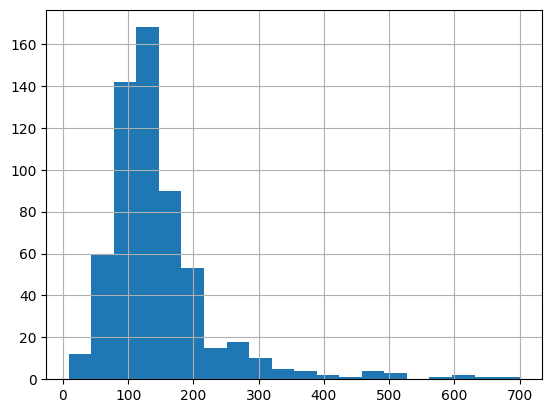

In [ ]:
df["LoanAmount"].hist(bins=20)

<Axes: >

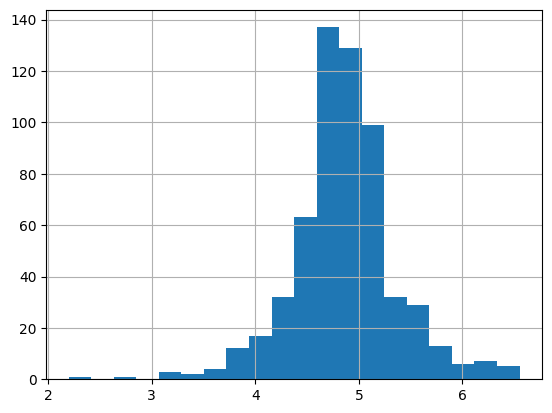

In [ ]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)

In [ ]:
df.shape

(614, 14)

<Axes: >

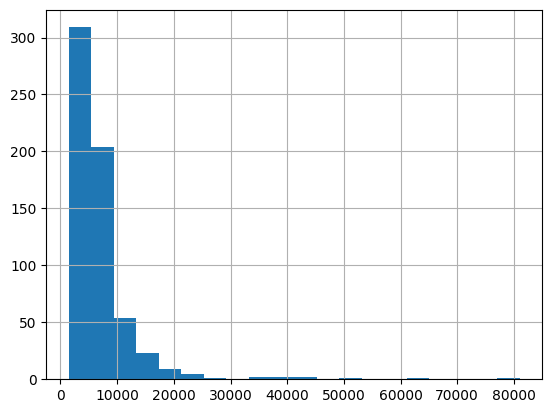

In [ ]:
df["totalincome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["totalincome"].hist(bins=20)

<Axes: >

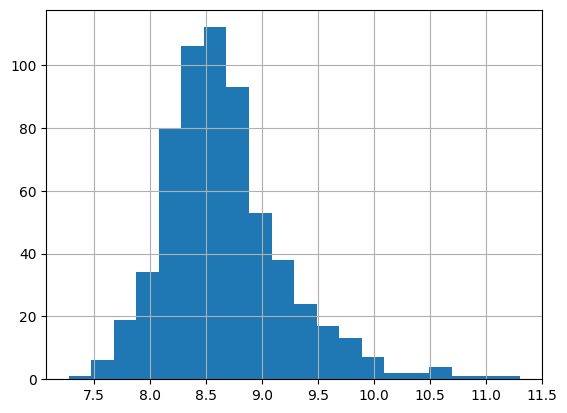

In [ ]:
df["totalincome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["totalincome_log"]=np.log(df["totalincome"])
df["totalincome_log"].hist(bins=20)

In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
totalincome          0
totalincome_log      0
dtype: int64

In [ ]:
df.shape

(614, 16)

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,totalincome,totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values


In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

number of people who take loan as group by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-16-f032ab3d440f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette="Set1")


<Axes: xlabel='Gender', ylabel='count'>

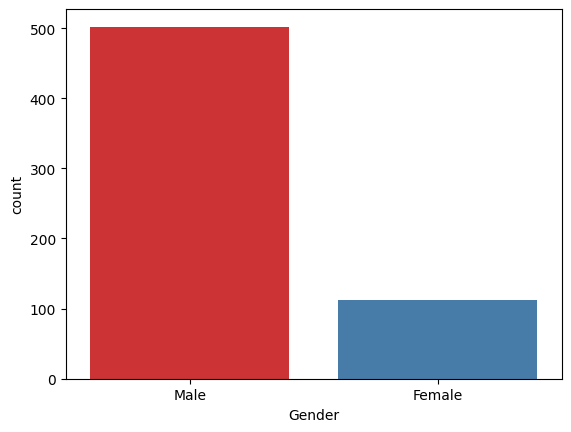

In [ ]:
print("number of people who take loan as group by gender")
print(df["Gender"].value_counts())
sns.countplot(x="Gender",data=df,palette="Set1")

number of people who take loan as group by merital status
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-30-bedfcf0c398d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married",data=df,palette="Set2")


<Axes: xlabel='Married', ylabel='count'>

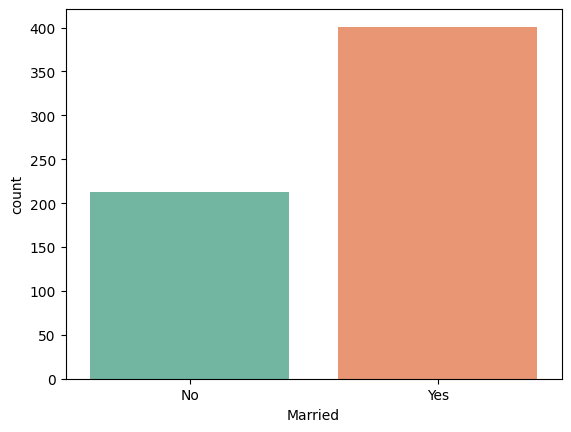

In [ ]:
print("number of people who take loan as group by merital status")
print(df["Married"].value_counts())
sns.countplot(x="Married",data=df,palette="Set2")

number of people who take loan as group by employment
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-33-e21d86261849>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed",data=df,palette="Set1")


<Axes: xlabel='Self_Employed', ylabel='count'>

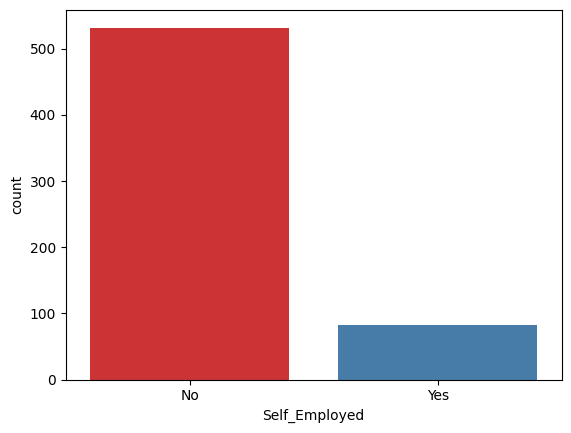

In [ ]:
print("number of people who take loan as group by employment")
print(df["Self_Employed"].value_counts())
sns.countplot(x="Self_Employed",data=df,palette="Set1")

number of people who take loan as group by the graduation
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<ipython-input-28-ce9c5d78bf01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education",data=df,palette="Set2")


<Axes: xlabel='Education', ylabel='count'>

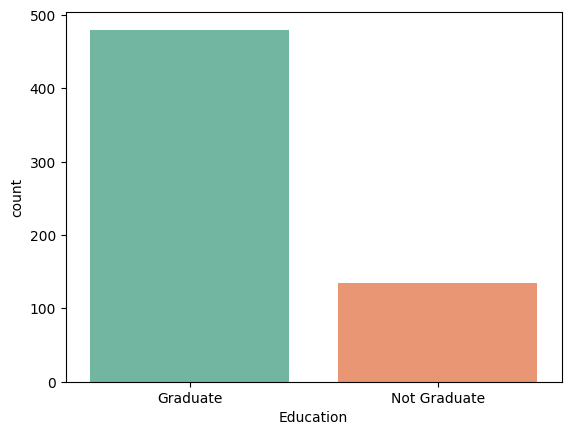

In [ ]:
print("number of people who take loan as group by the graduation")
print(df["Education"].value_counts())
sns.countplot(x="Education",data=df,palette="Set2")

number of people who take loan as group by gender
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

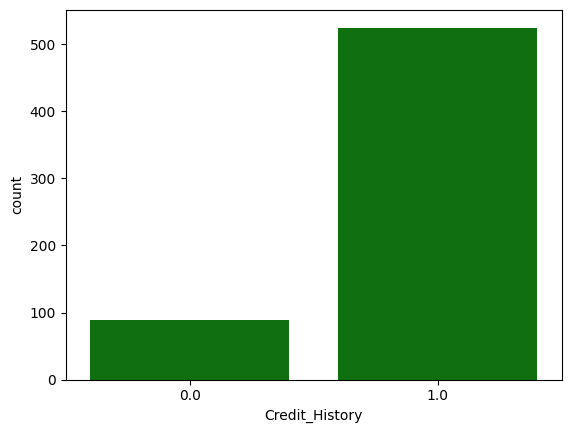

In [ ]:
print("number of people who take loan as group by gender")
print(df["Credit_History"].value_counts())
sns.countplot(x="Credit_History",data=df,color="green")

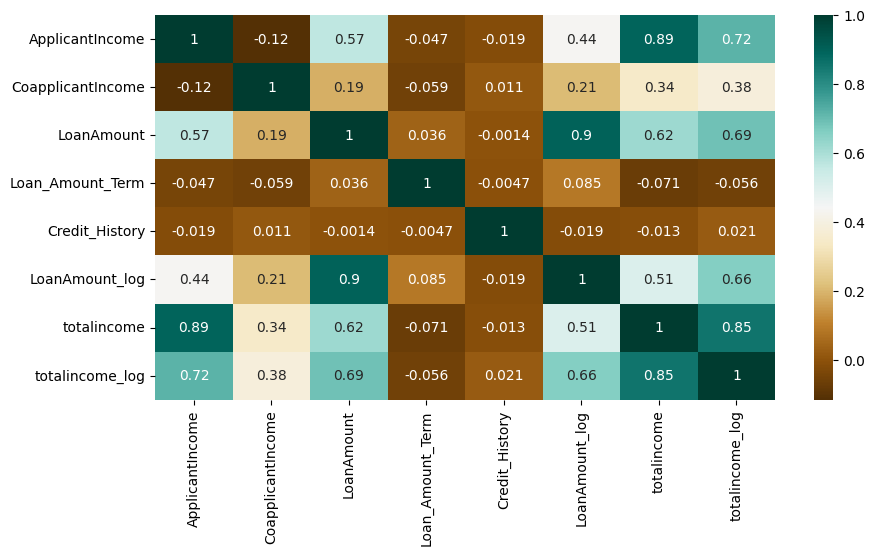

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, cmap="BrBG", annot=True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(491, 8)
(491,)
(123, 8)
(123,)


In [ ]:

# Assuming x_train is a NumPy array or a Pandas DataFrame
# If it's a NumPy array, convert it to DataFrame for easier handling
if isinstance(x_train, np.ndarray):
    x_train = pd.DataFrame(x_train)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify the categorical columns (assuming columns 0 to 4 and column 7 are categorical)
categorical_columns = [0, 1, 2, 3, 4]

# Convert these columns to string type to ensure uniformity
for col in categorical_columns:
    x_train[col] = x_train[col].astype(str)

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    x_train[col] = label_encoder.fit_transform(x_train[col])

# If x_train was originally a NumPy array, convert it back
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values

print(x_train)



[[1 1 0 ... 1.0 4.875197323201151 5858.0]
 [1 0 1 ... 1.0 5.278114659230517 11250.0]
 [1 1 0 ... 0.0 5.003946305945459 5681.0]
 ...
 [1 1 3 ... 1.0 5.298317366548036 8334.0]
 [1 1 0 ... 1.0 5.075173815233827 6033.0]
 [0 1 0 ... 1.0 5.204006687076795 6486.0]]


In [ ]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
# Assuming x_train is a NumPy array or a Pandas DataFrame
# If it's a NumPy array, convert it to DataFrame for easier handling
if isinstance(x_train, np.ndarray):
    x_test = pd.DataFrame(x_test)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify the categorical columns (assuming columns 0 to 4 and column 7 are categorical)
categorical_columns = [0, 1, 2, 3, 4]

# Convert these columns to string type to ensure uniformity
for col in categorical_columns:
    x_test[col] = x_test[col].astype(str)

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    x_test[col] = label_encoder.fit_transform(x_test[col])

# If x_train was originally a NumPy array, convert it back
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.values

print(x_test)

[[1 0 0 0 4 1.0 4.430816798843313 7085.0]
 [0 0 0 0 4 1.0 4.718498871295094 4230.0]
 [1 1 0 0 4 1.0 5.780743515792329 10039.0]
 [1 1 0 0 4 1.0 4.700480365792417 6784.0]
 [1 1 2 0 4 1.0 4.574710978503383 3875.0]
 [1 1 0 1 2 0.0 5.10594547390058 6058.0]
 [1 1 3 0 2 1.0 5.056245805348308 6417.0]
 [1 0 0 0 4 1.0 6.003887067106539 12876.0]
 [1 0 0 0 4 0.0 4.820281565605037 5124.0]
 [1 1 0 0 4 1.0 4.852030263919617 5233.0]
 [0 0 0 0 4 1.0 4.430816798843313 2917.0]
 [1 1 1 0 4 1.0 4.553876891600541 2895.0]
 [0 0 0 0 4 1.0 5.634789603169249 8333.0]
 [1 1 2 0 4 1.0 5.4638318050256105 8667.0]
 [1 1 0 0 4 1.0 4.564348191467836 14880.0]
 [1 1 1 0 4 1.0 4.204692619390966 3875.0]
 [1 0 1 1 4 1.0 5.247024072160486 4311.0]
 [1 0 0 1 4 1.0 4.882801922586371 3946.0]
 [0 0 0 0 4 1.0 4.532599493153256 2500.0]
 [1 1 0 1 4 0.0 5.198497031265826 4787.0]
 [0 1 0 0 4 0.0 4.787491742782046 6085.0]
 [1 1 0 0 4 1.0 4.962844630259907 4765.0]
 [1 1 2 0 4 1.0 4.68213122712422 7550.0]
 [1 1 2 0 4 1.0 5.10594547390058

In [ ]:
y_test=LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred=rfc.predict(x_test)
print("acc of rfc is: ",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of rfc is:  0.7479674796747967


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
!pip install scikit-learn
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [ ]:

from sklearn import metrics
y_pred=nbc.predict(x_test)
print("acc of nbc is: ",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of nbc is:  0.8373983739837398


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics
y_pred=dtc.predict(x_test)
print("acc of dtc is: ",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of dtc is:  0.7317073170731707


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn import metrics
y_pred=knc.predict(x_test)
print("acc of knc is: ",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of knc is:  0.7967479674796748


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
y_pred=lgc.predict(x_test)
print("acc of lgc is: ",metrics.accuracy_score(y_pred,y_test))

acc of lgc is:  0.8292682926829268


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
from sklearn import metrics
y_pred=gbc.predict(x_test)
print("acc of gbc is: ",metrics.accuracy_score(y_pred,y_test))

acc of gbc is:  0.7479674796747967
